In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [9]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

#print(X.head())

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [10]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}
#**params

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

print(table_train)


train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


col_0     0.0   1.0   All
partner                  
0.0      4167   341  4508
1.0      1291  1533  2824
All      5458  1874  7332
Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


In [37]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'exponential'}
#**params

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

print(table_train)


train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


col_0     0.0   1.0   All
partner                  
0.0      4274   234  4508
1.0      1093  1731  2824
All      5367  1965  7332
Training set accuracy:
Percent Type I errors: 0.031914893617021274
Percent Type II errors: 0.14907255864702673

Test set accuracy:
Percent Type I errors: 0.07116564417177915
Percent Type II errors: 0.18159509202453988


Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

1.0
138.61266983830976


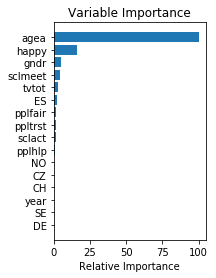

In [28]:
feature_importance = clf.feature_importances_
print(feature_importance.sum())



# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
print(feature_importance.sum())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

In [31]:
X.columns

Index(['year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet',
       'sclact', 'gndr', 'agea'],
      dtype='object')

In [32]:
# Make the categorical variable 'country' into dummies.
X['agea_happy'] = X['agea'] * X['happy']
X['agea_gndr'] = X['agea'] * X['gndr']
X['agea_sclmeet'] = X['agea'] * X['sclmeet']
X['happy_gndr'] = X['happy'] * X['gndr']
X['happy_sclmeet'] = X['happy'] * X['sclmeet']


# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train2, y_train2 = X[:offset], y[:offset]

# And put 10% in the test set.
X_test2, y_test2 = X[offset:], y[offset:]

#print(X.head())

c:\users\wscott\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\wscott\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params2 = {'n_estimators': 1000,
          'max_depth': 2,
          'loss': 'deviance',
          'subsample' : 0.5}

         #'min_samples_leaf' : 5}
#**params

# Initialize and fit the model.
clf2 = ensemble.GradientBoostingClassifier(**params2)
clf2.fit(X_train2, y_train2)

predict_train2 = clf2.predict(X_train2)
predict_test2 = clf2.predict(X_test2)

# Accuracy tables.
table_train2 = pd.crosstab(y_train2, predict_train2, margins=True)
table_test2 = pd.crosstab(y_test2, predict_test2, margins=True)

#print(table_train)


train_tI_errors2 = table_train2.loc[0.0,1.0] / table_train2.loc['All','All']
train_tII_errors2 = table_train2.loc[1.0,0.0] / table_train2.loc['All','All']

test_tI_errors2 = table_test2.loc[0.0,1.0]/table_test2.loc['All','All']
test_tII_errors2 = table_test2.loc[1.0,0.0]/table_test2.loc['All','All']
test_All_errors2 = (table_test2.loc[1.0,0.0] + table_test2.loc[0.0,1.0]) /table_test2.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors2, train_tII_errors2, test_tI_errors2, test_tII_errors2))


print('Total Error: {}'.format(test_All_errors2))

Training set accuracy:
Percent Type I errors: 0.04159847244953628
Percent Type II errors: 0.15671031096563012

Test set accuracy:
Percent Type I errors: 0.09202453987730061
Percent Type II errors: 0.18404907975460122
Total Error: 0.27607361963190186


1.0
313.62306756016125


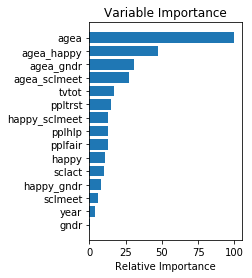

In [40]:
feature_importance2 = clf2.feature_importances_
print(feature_importance2.sum())



# Make importances relative to max importance.
feature_importance2 = 100.0 * (feature_importance2 / feature_importance2.max())
print(feature_importance2.sum())

sorted_idx2 = np.argsort(feature_importance2)
pos = np.arange(sorted_idx2.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance2[sorted_idx2], align='center')
plt.yticks(pos, X.columns[sorted_idx2])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [49]:
correlation_matrix = X.corr()
display(correlation_matrix)

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,agea_happy,agea_gndr,agea_sclmeet,happy_gndr,happy_sclmeet
year,1.000000,-0.031596,-0.001600,0.004283,-0.032901,-0.013378,-0.028502,0.012150,0.001355,-0.003520,-0.009733,-0.002965,-0.012521,-0.008215,-0.029354
tvtot,-0.031596,1.000000,-0.142422,-0.119277,-0.069080,-0.118598,-0.078864,-0.092375,0.017922,0.257674,0.159138,0.198974,0.173123,-0.055287,-0.125004
ppltrst,-0.001600,-0.142422,1.000000,0.597506,0.459250,0.231533,0.122555,0.137491,-0.029921,-0.029412,0.093452,-0.041378,0.049429,0.107068,0.218143
pplfair,0.004283,-0.119277,0.597506,1.000000,0.480931,0.247755,0.096501,0.128808,0.022251,0.014724,0.142029,0.024530,0.072515,0.161255,0.203492
pplhlp,-0.032901,-0.069080,0.459250,0.480931,1.000000,0.215323,0.080489,0.092673,0.042046,0.040351,0.146244,0.054497,0.084799,0.159035,0.177702
happy,-0.013378,-0.118598,0.231533,0.247755,0.215323,1.000000,0.182944,0.192030,-0.022413,-0.042970,0.473904,-0.050481,0.073647,0.542478,0.692849
sclmeet,-0.028502,-0.078864,0.122555,0.096501,0.080489,0.182944,1.000000,0.283319,0.009533,-0.194443,-0.075821,-0.127598,0.454794,0.113899,0.811592
sclact,0.012150,-0.092375,0.137491,0.128808,0.092673,0.192030,0.283319,1.000000,-0.031648,-0.059442,0.053886,-0.060063,0.123117,0.080131,0.308633
gndr,0.001355,0.017922,-0.029921,0.022251,0.042046,-0.022413,0.009533,-0.031648,1.000000,0.020598,0.002397,0.640597,0.030442,0.807616,-0.001063
agea,-0.003520,0.257674,-0.029412,0.014724,0.040351,-0.042970,-0.194443,-0.059442,0.020598,1.000000,0.838211,0.741659,0.756282,-0.010638,-0.168050


In [48]:
X = X.loc[:, ~X.columns.isin(['partner', 'cntry', 'idno', 'CH', 'CZ', 'DE', 'ES', 'NO', 'SE'])]